# Modeling

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import string, re
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

nltk.download("words")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

pd.set_option('display.max_columns', 10000)

[nltk_data] Error loading words: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>


In [378]:
df=pd.read_csv('clean_df.csv',index_col=0)
df2=pd.read_csv('sentiment2.csv',index_col=0)

In [379]:
def process_article(article):
    tokens = nltk.word_tokenize(article)
    print(tokens)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed 

In [380]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', text, flags=re.MULTILINE)


    return text


In [381]:
df["target"]=df['emotion'].apply(lambda x: 0 if x=='Negative emotion' else( 1 if  x=="Positive emotion" else 2 ))
df["clean_tweet"]=[clean_text(x) for x in df["clean_tweet"]]

In [384]:
data = df['clean_tweet']
target = df['target']

In [385]:
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©'"\/","\\","\\x89ûï","\\x89ûï","\\x89ûï",
            'said', 'one', 'com', 'satirewire', '-', '–', '—', 'satirewire.com',"sxsw",'quo','rt','',"sxswi"]
sw_set = set(sw_list)

In [386]:
# applying the above function to our data/features 
processed_data = list(map(process_article, data))

['i', 'have', 'a', 'iphone', 'after', 'hrs', 'tweeting', 'at', 'rise', 'austin', 'it', 'was', 'dead', 'i', 'need', 'to', 'upgrade', 'plugin', 'stations', 'at', 'sxsw']
['jessedee', 'know', 'about', 'fludapp', 'awesome', 'ipad', 'iphone', 'app', 'that', 'you', 'll', 'likely', 'appreciate', 'for', 'its', 'design', 'also', 'they', 're', 'giving', 'free', 'ts', 'at', 'sxsw']
['swonderlin', 'can', 'not', 'wait', 'for', 'ipad', 'also', 'they', 'should', 'sale', 'them', 'down', 'at', 'sxsw']
['sxsw', 'i', 'hope', 'this', 'year', 's', 'festival', 'isn', 't', 'as', 'crashy', 'as', 'this', 'year', 's', 'iphone', 'app', 'sxsw']
['sxtxstate', 'great', 'stuff', 'on', 'fri', 'sxsw', 'marissa', 'mayer', 'google', 'tim', 'o', 'reilly', 'tech', 'books', 'conferences', 'amp', 'matt', 'mullenweg', 'wordpress']
['new', 'ipad', 'apps', 'for', 'speechtherapy', 'and', 'communication', 'are', 'showcased', 'at', 'the', 'sxsw', 'conference', 'http', 'ht', 'ly', 'iear', 'edchat', 'asd']
['sxsw', 'is', 'just', 's

['wordpress', 'powers', 'of', 'websites', 'from', 'sxsw', 'talk', 'from', 'wp', 'founder', 'wow', 'the', 'other', 'russian', 'spam', 'bots', 'nigerian', 'bankers', 'google']
['brilliant', 'pr', 'stunt', 'business', 'idea', 'and', 'customer', 'service', 'response', 'in', 'one', 'apple', 'sets', 'up', 'a', 'pop', 'up', 'store', 'at', 'sxsw', 'draws', 'crowds', 'media', 'amp', 'revenue']
['panels', 'on', 'pr', 'cloud', 'computing', 'android', 'design', 'iphone', 'design', 'today', 'hope', 'to', 'redeem', 'my', 'panel', 'experience', 'in', 'one', 'fell', 'swoop', 'sxsw']
['excellent', 'presentation', 'by', 'mention', 'on', 'quot', 'the', 'untapped', 'ipad', 'market', 'is', 'your', 'site', 'pour', 'quot', 'sxsw', 'poursite', 'accessibility']
['excellent', 'presentation', 'on', 'digital', 'magazines', 'link', 'touchingstories', 'sxsw']
['hey', 'sxsw', 'presenters', 'amp', 'attendees', 'here', 'are', 'tips', 'on', 'how', 'to', 'show', 'presentations', 'on', 'the', 'ipad', 'and', 'iphone', 'li

['love', 'it', 'mention', 'at', 'sxsw', 'quot', 'apple', 'comes', 'up', 'with', 'cool', 'technology', 'no', 'one', 's', 'ever', 'heard', 'of', 'because', 'they', 'don', 't', 'go', 'to', 'conferences', 'quot']
['love', 'it', 'mention', 'at', 'sxsw', 'quot', 'apple', 'comes', 'up', 'with', 'cool', 'technology', 'no', 'one', 's', 'ever', 'heard', 'of', 'because', 'they', 'don', 't', 'go', 'to', 'link']
['love', 'rt', 'mention', 'anyone', 'at', 'the', 'show', 'have', 'an', 'iphone', 'charger', 'need', 'to', 'tweet', 'jokes', 'about', 'beards', 'text', 'ppl', 'to', 'make', 'them', 'jealous', 'sxsw']
['ran', 'into', 'mention', 'at', 'the', 'temporary', 'apple', 'store', 'with', 'mention', 'mention', 'and', 'amy', 'sxsw']
['mention', 'mention', 'be', 'sure', 'to', 'check', 'out', 'the', 'mention', 'jukebox', 'app', 'running', 'party', 'music', 'for', 'sxsw', 'with', 'the', 'mention', 'api', 'link']
['i', 'agree', 'mention', 'but', 'they', 're', 'all', 'so', 'great', 'quot', 'iphone', 'apps', 

['just', 'launched', 'the', 'pop', 'up', 'apple', 'store', 'at', 'sxsw', 'it', 's', 'our', 'quot', 'vintage', 'quot', 'store', 'format', 'mostly', 'ipods', 'and', 'snarky', 'employees', 'ah', 'the', 'good', 'old', 'days']
['saveustechies', 'panel', 'at', 'sxsw', 'getting', 'off', 'to', 'a', 'great', 'start', 'with', 'a', 'video', 'on', 'the', 'surui', 'carbon', 'project', 'by', 'google', 'link']
['apple', 's', 'schiller', 'white', 'iphone', 'will', 'debut', 'in', 'spring', 'don', 't', 'they', 'also', 'try', 'to', 'sell', 'you', 'faster', 'speed', 'cable', 'sxsw', 'm', 'link']
['best', 'tsotchke', 'at', 'sxsw', 'so', 'far\x89ûómy', 'iphone', 'was', 'almost', 'out', 'of', 'power', 'and', 'powermat', 'gave', 'me', 'a', 'free', 'fully', 'charged', 'battery', 'link']
['stupid', 'technology', 'you', 'always', 'fail', 'at', 'important', 'times', 'at', 'sxsw', 'w', 'an', 'iphone', 'laptop', 'and', 'blackberry', 'and', 'the', 'only', 'thing', 'working', 'is', 'my', 'pen']
['congrats', 'chris', 

['the', 'simplest', 'gesture', 'on', 'the', 'ipad', 'should', 'be', 'used', 'for', 'core', 'interactions', 'sxsw', 'touchingstories']
['awesome', 'restaurant', 'week', 'app', 'for', 'iphone', 'link', 'austinites', 'sxsw']
['interesting', 'if', 'in', 'fact', 'it', 'takes', 'into', 'consideration', 'the', 'preso', 'by', 'paul', 'adams', 'rt', 'mention', 'google', 'circles', 'will', 'be', 'sxsw']
['brutal', 'question', 'served', 'up', 'to', 'marissa', 'mayer', 'about', 'jc', 'penney', 'mapping', 'getting', 'rerouted', 'to', 'macy', 's', 'uncomfortable', 'for', 'mention', 'sxsw']
['there', 's', 'yet', 'another', 'line', 'at', 'the', 'austin', 'apple', 'store', 'for', 'ipad', 'going', 'well', 'around', 'the', 'block', 'sxsw']
['first', 'tweet', 'from', 'a', 'plane', 'feedback', 'for', 'gogo', 'no', 'registration', 'via', 'fb', 'connect', 'or', 'twitter', 'no', 'paypal', 'or', 'google', 'integration', 'to', 'pay', 'you', 'sxsw']
['fun', 'to', 'meet', 'the', 'mention', 'folks', 'at', 'sxsw', 

['the', 'ipad', 'is', 'the', 'device', 'of', 'the', 'moment', 'wireless', 'power', 'is', 'the', 'next', 'essential', 'technology', 'and', 'the', 'api', 'is', 'king', 'sxsw']
['how', 'long', 'is', 'the', 'line', 'at', 'the', 'sxsw', 'apple', 'store', 'downtown']
['how', 'long', 'is', 'the', 'line', 'at', 'the', 'apple', 'store', 'sxsw']
['mention', 'is', 'there', 'already', 'a', 'line', 'for', 'the', 'ipad', 's', 'that', 'just', 'arrived', 'sxsw']
['so', 'where', 'is', 'this', 'temporary', 'apple', 'store', 'setup', 'sxsw']
['how', 'cool', 'is', 'this', 'apple', 'opening', 'a', 'temporary', 'store', 'for', 'the', 'launch', 'and', 'sxsw', 'link']
['mention', 'is', 'working', 'on', 'an', 'tablet', 'ipad', 'app', 'no', 'demo', 'yet', 'but', 'they', 'are', 'excited', 'sxsw', 'sxswmobileapps', 'accesssxsw']
['loving', 'this', 'hello', 'holler', 'gram', 'for', 'ipad', 'link', 'via', 'mention', 'sxsw']
['notsurprised', 'lots', 'of', 'geosocial', 'news', 'today', 'w', 'sxsw', 'beginning', 'goog

['free', 'itunes', 'sxsw', 'link', 'takes', 'you', 'to', 'mention', 'itunes', 'store', 'link']
['ipad', 'lines', 'and', 'a', 'half', 'blocks', 'at', 'sxsw', 'popup', 'store', 'link']
['thewildernessdowntown', 'com', 'best', 'of', 'show', 'at', 'sxsw', 'google', 's', 'thomas', 'gayno', 'quot', 'it', 'is', 'like', 'a', 'choreography', 'of', 'browser', 'windows', 'quot', 'sxsw']
['the', 'internet', 'blurs', 'link', 'the', 'ipad', 'fades', 'link', '\x89ûò', 'mention', 'at', 'sxsw']
['google', 's', 'new', 'quot', 'route', 'around', 'quot', 'feature', 'gives', 'alternate', 'routes', 'to', 'avoid', 'traffic', 'collectively', 'saving', 'drivers', 'yrs', 'day', 'sxsw']
['mention', 'new', 'ubersocial', 'iphone', 'now', 'in', 'app', 'store', 'includes', 'uberguide', 'to', 'sxsw', 'sponsored', 'by', 'mashable', 'link']
['mention', 'new', 'ipad', 'apps', 'for', 'speechtherapy', 'and', 'communication', 'are', 'showcased', 'at', 'the', 'sxsw', 'conference', 'link', 'iear', 'edchat', 'asd']
['mention'

['rt', 'mention', 'sxsw', 'gruber', 'keeps', 'on', 'desk', 'apple', 'extended', 'keyboard', 'discontinued', 'in', 'loud', 'but', 'feels', 'like', 'he', 'writes', 'better']
['rt', 'mention', 'sxsw', 'ipad', 'design', 'headaches', 'take', 'two', 'tablet', 'and', 'call', 'me', 'in', 'the', 'morning', 'link']
['rt', 'mention', 'ux', 'uxdes', 'talk', 'is', 'really', 'about', 'an', 'exploration', 'of', 'the', 'wild', 'wild', 'west', 'of', 'ipad', 'design', 'sxsw']
['rt', 'mention', 'uxdes', 'mention', 'is', 'glad', 'there', 'are', 'no', 'standard', 'ipad', 'navigation', 'tools', 'she', 'might', 'be', 'the', 'only', 'one', 'sxsw']
['rt', 'mention', 'wahoos', 'sxsw', 'party', 'free', 'beers', 'tacos', 'and', 'ritas', 'thurs', 'link']
['rt', 'mention', 'want', 'micro', 'usb', 'charger', 'for', 'samsung', 'android', 'or', 'kindle', 'at', 'sxsw', 'starting', 'will', 'pay', 'for', 'days', 'link', 'snapgoods']
['rt', 'mention', 'rt', 'mention', 'love', 'it', 'mention', 'sxsw', 'quot', 'apple', 'com

['rt', 'mention', 'i', 'wish', 'the', 'apple', 'store', 'employees', 'cheering', 'for', 'all', 'the', 'people', 'in', 'line', 'at', 'the', 'pop', 'up', 'apple', 'store', 'would', 'cheer', 'me', 'on', 'while', 'i', 'do', 'timesheets', 'sxsw']
['rt', 'mention', 'i', 'wonder', 'if', 'apple', 'intentionally', 'scheduled', 'the', 'release', 'to', 'coincide', 'with', 'sxsw', 'steve', 'jobs', 'you', 'crafty', 'genius', 'you\x89û']
['rt', 'mention', 'i', 'd', 'pay', 'an', 'ipad', 'to', 'the', 'person', 'who', 'gets', 'the', 'most', 'zaarly', 'referrals', 'by', 'march', 'winning', 'sxsw', 'link']
['rt', 'mention', 'i', 'd', 'pay', 'an', 'ipad', 'to', 'the', 'person', 'who', 'gets', 'the', 'most', 'zaarly', 'referrals', 'by', 'march', 'zaarlyiscoming', 'winning', 'sxsw', 'link']
['rt', 'mention', 'i', 'd', 'say', 'of', 'booths', 'at', 'this', 'tradeshow', 'are', 'waffling', 'off', 'an', 'ipad', 'about', 'the', 'same', 'portion', 'have', 'reps', 'dressed', 'up', 'as', 'crazy', 'characters', 'sxsw

['oh', 'mention', 'the', 'apple', 'pop', 'up', 'store', 'quot', 'oh', 'you', 'have', 'the', 'old', 'one', 'quot', 'crazytimes', 'sxsw']
['rt', 'mention', 'the', 'apple', 'pop', 'up', 'store', 'line', 'finally', 'dwindled', 'time', 'to', 'check', 'out', 'sxsw']
['rt', 'mention', 'the', 'beluga', 'iphone', 'app', 'is', 'the', 'highlight', 'of', 'this', 'sxsw', 'excellent', 'way', 'to', 'coordinate', 'the', 'relief', 'effort']
['rt', 'mention', 'the', 'big', 'sxsw', 'rumor', 'google', 'to', 'launch', 'ludicon', 'based', 'quot', 'circles', 'quot', 'facebook', 'killer', 'supposedly', 'mention', 'already', 'saw', 'it', 'and', 'it', 's', 'ossum']
['rt', 'mention', 'the', 'big', 'idea', 'google', 'leaves', 'nothing', 'left', 'to', 'discover', 'link', 'sxsw', 'sxswi']
['rt', 'mention', 'the', 'countdown', 'to', 'sxsw', 'has', 'begun', 'mention', 'will', 'be', 'there\x89û', 'pick', 'up', 'quot', 'fried', 'speakers', 'quot', 'on', 'itunes', 'link']
['rt', 'mention', 'the', 'day', 'bank', 'of', 'a

['ze', 'frank', 'project', 'walk', 'down', 'google', 'streetview', 'down', 'a', 'street', 'u', 've', 'walked', 'many', 'times', 'and', 'revelations', 'pop', 'up', 'sxsw']
['sxsw', 'sxprotect', 'link', 'is', 'the', 'google', 'doc', 'to', 'get', 'all', 'the', 'relevant', 'links', 'from', 'this', 'panel']
['how', 'to', 'improve', 'website', 'rankings', 'google', 'bing', 'advice', 'at', 'sxsw', 'link', 'get', 'com', 'or', 'pk', 'but', 'be', 'content', 'rich', 'deep']
['how', 'to', 'improve', 'website', 'rankings', 'advice', 'from', 'google', 'and', 'bing', 'at', 'sxsw', 'poynter', 'link']
['how', 'to', 'improve', 'website', 'rankings', 'advice', 'from', 'google', 'amp', 'bing', 'at', 'sxsw', 'link']
['how', 'to', 'improve', 'website', 'rankings', 'advice', 'from', 'google', 'amp', 'bing', 'at', 'sxsw', 'link', 'via', 'mention']
['how', 'to', 'improve', 'website', 'rankings', 'advice', 'from', 'google', 'and', 'bing', 'at', 'sxsw', 'poynter', 'link']
['sxsw', 'peeps', 'you', 'can', 'now', '

['xcitng', 'rt', 'mention', 'sxsw', 'approaching', 'amp', 'so', 'are', 'our', 'soft', 'launch', 'plans', 'android', 'demo', 'running', 'flyers', 'printed', 'and', 't', 'shirts', 'packed', 'for', 'austin']
['if', 'u', 're', 'at', 'sxsw', 'don', 't', 'u', 'have', 'cooler', 'things', 'to', 'do', 'rt', 'mention', 'am', 'line', 'at', 'apple', 'pop', 'up', 'store', 'it', 'opens', 'at', 'pm', 'sxsw', 'link']
['someone', 'at', 'sxsw', 'needs', 'to', 'host', 'a', 'race', 'between', 'the', 'sms', 'apps', 'for', 'iphone', 'pink', 'slips', 'or', 'probably', 'something', 'much', 'cooler', 'than', 'that']
['someone', 'at', 'sxsw', 'stole', 'my', 'ipad', 'from', 'mtg', 'room', 'and', 'it', 'wasn', 't', 'even', 'a', 'new', 'one', 'talk', 'about', 'lame']
['friends', 'at', 'sxsw', 'can', 'you', 'take', 'some', 'views', 'with', 'panorama', 'link', 'so', 'i', 'feel', 'like', 'i', 'm', 'there', 'i', 'll', 'gift', 'you', 'the', 'app']
['next', 'up', 'at', 'sxsw', 'ding', 'dong', 'with', 'google', 'and', 'b

['by', 'the', 'way', 'being', 'at', 'sxsw', 'means', 'i', 'now', 'have', 'to', 'get', 'an', 'ipad', 'or']
['at', 'a', 'party', 'being', 'thrown', 'by', 'google', 'and', 'the', 'aclu', 'don', 't', 'tell', 'my', 'dad', 'sxsw', 'mention', 'maggie', 'mae', 's', 'w', 'others', 'link']
['i', 'think', 'my', 'effing', 'hubby', 'is', 'in', 'line', 'for', 'an', 'ipad', 'can', 'someone', 'point', 'him', 'towards', 'the', 'line', 'up', 'for', 'wife', 'number', 'sxswi', 'sxsw']
['in', 'case', 'my', 'fairy', 'god', 'mother', 'reading', 'mail', 'my', 'ìù\x80±g', 'wish', 'this', 'week', 'is', 'go', 'sxsw', '\x89ï\x8d', 'for', 'the', 'android', '\x89ïî', 'dev', '\x89ïà', 'meetup', 'mention', 'hilton', 'sat']
['the', 'motley', 'fool', 'google', 'prepares', 'for', 'its', 'fight', 'with', 'facebook', 'circles', 'may', 'not', 'have', 'appeared', 'at', 'sxsw', 'but', 'on', 'its', 'way', 'link']
['this', 'is', 'my', 'friend', 'mention', 'new', 'iphone', 'photosharing', 'app', 'he', 's', 'developed', 'ck', 'i

In [387]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)

9245

In [388]:
# creating a list with all lemmatized outputs
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [389]:
X_lem = lemmatized_output

y_lem = target

In [391]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)
tfidf = TfidfVectorizer()

tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)


In [393]:
rf_classifier_lem = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier_lem.fit(tfidf_data_train_lem, y_train_lem)

rf_test_preds_lem = rf_classifier_lem.predict(tfidf_data_test_lem)

In [395]:
rf_acc_score_lem = accuracy_score(y_test_lem, rf_test_preds_lem)
rf_f1_score_lem = f1_score(y_test_lem, rf_test_preds_lem,average="micro")
print('Random Forest with Lemmatization Features')
print("Testing Accuracy: {:.4}".format(rf_acc_score_lem))
print()
print("F1 Score: {:.4}".format(rf_f1_score_lem))

Random Forest with Lemmatization Features
Testing Accuracy: 0.6723

F1 Score: 0.6723


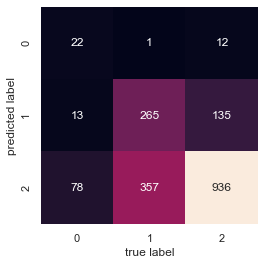

In [396]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test_lem, rf_test_preds_lem)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1','2'], yticklabels=['0', '1',"2"])
plt.xlabel('true label')
plt.ylabel('predicted label');

# Tokenized Model

In [317]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['clean_tweet'])

In [319]:
df_token = pd.DataFrame(text_counts.todense(),columns = cv.get_feature_names())
dummy=pd.get_dummies(df[['company','brand']],drop_first=True)
df_token=pd.concat([df_token, dummy], axis=1, sort=False)
Y = df['target']

aapl  aaron  aarpbulletin  ab  abacus  abandoned  abba  aber  abilities  \
0        0      0             0   0       0          0     0     0          0   
1        0      0             0   0       0          0     0     0          0   
2        0      0             0   0       0          0     0     0          0   
3        0      0             0   0       0          0     0     0          0   
4        0      0             0   0       0          0     0     0          0   
...    ...    ...           ...  ..     ...        ...   ...   ...        ...   
9087     0      0             0   0       0          0     0     0          0   
9088     0      0             0   0       0          0     0     0          0   
9089     0      0             0   0       0          0     0     0          0   
9090     0      0             0   0       0          0     0     0          0   
9091     0      0             0   0       0          0     0     0          0   

      ability  able  abnormal  abound  abroad  absolute  absolutely  \
0           0     0         0       0       0         0           0   
1           0     0         0       0       0         0           0   
2           0     0         0       0       0         0           0   
3           0     0         0       0       0         0           0   
4           0     0         0       0       0         0           0   
...       ...   ...       ...     ...     ...       ...         ...   
9087        0     0         0       0       0         0           0   
9088        0     0         0       0       0         0           0   
9089        0     0         0       0       0         0           0   
9090        0     0         0       0       0         0           0   
9091        0     0         0       0       0         0           0   

      absolutley  abt  abuzz  academy  acc  accelerater  acceleration  \
0              0    0      0        0    0            0             0   
1              0    0      0        0    0            0             0   
2              0    0      0        0    0            0             0   
3              0    0      0        0    0            0             0   
4              0    0      0        0    0            0             0   
...          ...  ...    ...      ...  ...          ...           ...   
9087           0    0      0        0    0            0             0   
9088           0    0      0        0    0            0             0   
9089           0    0      0        0    0            0             0   
9090           0    0      0        0    0            0             0   
9091           0    0      0        0    0            0             0   

      accelerator  accept  acceptable  access  accessibility  accessible  \
0               0       0           0       0              0           0   
1               0       0           0       0              0           0   
2               0       0           0       0              0           0   
3               0       0           0       0              0           0   
4               0       0           0       0              0           0   
...           ...     ...         ...     ...            ...         ...   
9087            0       0           0       0              0           0   
9088            0       0           0       0              0           0   
9089            0       0           0       0              0           0   
9090            0       0           0       0              0           0   
9091            0       0           0       0              0           0   

      accessories  accessory  accesssxsw  accidentally  accommodate  \
0               0          0           0             0            0   
1               0          0           0             0            0   
2               0          0           0             0            0   
3               0          0           0             0            0   
4               0          0       

Random Forest

In [333]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(df_token, Y, test_size=0.20, random_state=1)

In [335]:
rf_cv = RandomForestClassifier(n_estimators=100, random_state=0)

rf_cv.fit(X_train_cv, y_train_cv)

rf_cv_preds = rf_cv.predict(X_test_cv)

In [336]:
rf_acc_score_cv = accuracy_score(y_test_cv, rf_cv_preds)
rf_f1_score_cv = f1_score(y_test_cv, rf_cv_preds,average="micro")
print('Random Forest with Count Vectorizer')
print("Testing Accuracy: {:.4}".format(rf_acc_score_cv))
print()
print("F1 Score: {:.4}".format(rf_f1_score_cv))

Random Forest with Lemmatization Features
Testing Accuracy: 0.6866

F1 Score: 0.6866


Logistic Regression

In [363]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_cv, y_train_cv)
y_pred_class = logreg.predict(X_test_cv)

In [364]:
rf_acc_score_cv = accuracy_score(y_test_cv, y_pred_class)
rf_f1_score_cv = f1_score(y_test_cv, rf_cv_preds,average="micro")
print('Random Forest with Count Vectorizer')
print("Testing Accuracy: {:.4}".format(rf_acc_score_cv))
print()
print("F1 Score: {:.4}".format(rf_f1_score_cv))

Random Forest with Count Vectorizer
Testing Accuracy: 0.7053

F1 Score: 0.6866


KNN

In [370]:
from sklearn.neighbors import KNeighborsClassifier

In [371]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_cv, y_train_cv)

knn_preds = knn.predict(X_test_cv)


In [372]:
rf_acc_score_cv = accuracy_score(y_test_cv, knn_preds)
rf_f1_score_cv = f1_score(y_test_cv, knn_preds,average="micro")
print('Random Forest with Count Vectorizer')
print("Testing Accuracy: {:.4}".format(rf_acc_score_cv))
print()
print("F1 Score: {:.4}".format(rf_f1_score_cv))

Random Forest with Count Vectorizer
Testing Accuracy: 0.6361

F1 Score: 0.6361


# TFIDF Model

In [355]:
def fn_tdm_tfidf(docs, xColNames = None, **kwargs):
    ''' create a term document matrix as pandas DataFrame
    with **kwargs you can pass arguments of CountVectorizer
    if xColNames is given the dataframe gets columns Names'''

    #initialize the  vectorizer
    tf = TfidfVectorizer(**kwargs)
    x1 = tf.fit_transform(docs)
    #create dataFrame
    df = pd.DataFrame(x1.toarray().transpose(), index = tf.get_feature_names())

    if xColNames is not None:
        df.columns = xColNames

    return df

In [356]:
df_tfidf=fn_tdm_tfidf(df['clean_tweet']).transpose()
df_tfidf=pd.concat([df_tfidf, dummy], axis=1, sort=False)

Random Forest

In [358]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(df_tfidf, Y, test_size=0.20, random_state=1)
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=0)

rf_tfidf.fit(X_train_tfidf, y_train_tfidf)

rf_tfidf_preds = rf_tfidf.predict(X_test_tfidf)

In [359]:
rf_acc_score_tfidf = accuracy_score(y_test_tfidf, rf_tfidf_preds)
rf_f1_score_tfidf = f1_score(y_test_tfidf, rf_tfidf_preds,average="micro")
print('Random Forest with Tfidf')
print("Testing Accuracy: {:.4}".format(rf_acc_score_tfidf))
print()
print("F1 Score: {:.4}".format(rf_f1_score_tfidf))

Random Forest with Tfidf
Testing Accuracy: 0.6778

F1 Score: 0.6778


Logistic Regression

In [366]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_tfidf, y_train_tfidf)
y_pred_class = logreg.predict(X_test_tfidf)

In [367]:
rf_acc_score_cv = accuracy_score(y_test_tfidf, y_pred_class)
rf_f1_score_cv = f1_score(y_test_tfidf, rf_tfidf_preds,average="micro")
print('Random Forest with Count Vectorizer')
print("Testing Accuracy: {:.4}".format(rf_acc_score_cv))
print()
print("F1 Score: {:.4}".format(rf_f1_score_cv))

Random Forest with Count Vectorizer
Testing Accuracy: 0.7103

F1 Score: 0.6778


KNN

In [374]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_tfidf, y_train_tfidf)

knn_preds = knn.predict(X_test_tfidf)



In [375]:
rf_acc_score_cv = accuracy_score(y_test_tfidf, knn_preds)
rf_f1_score_cv = f1_score(y_test_cv, knn_preds,average="micro")
print('Random Forest with Count Vectorizer')
print("Testing Accuracy: {:.4}".format(rf_acc_score_cv))
print()
print("F1 Score: {:.4}".format(rf_f1_score_cv))

Random Forest with Count Vectorizer
Testing Accuracy: 0.6575

F1 Score: 0.6575
